<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/portfolio/pca_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
def get_nifty50_tickers():
    data = pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/data/main/STOCKS100.txt', sep='\t')
    nifty100 = data['yahoo finance ticker'].tolist()
    reject_lst=['MOTHERSUMI.NS', 'CADILAHC.NS', 'ADANITRANS.NS', 'SRTRANSFIN.NS', 'INFRATEL-EQ.NS','HDFC.NS']
    nifty_final= [item for item in nifty100 if item not in reject_lst]

    return nifty_final
# Function to retrieve Nifty 50 stock data
def get_nifty_50_data():

    nifty_50_symbols=get_nifty50_tickers()
    start_date = "2022-01-01"
    end_date = "2022-12-31"

    nifty_50_data = yf.download(nifty_50_symbols, start=start_date, end=end_date)["Adj Close"]
    return nifty_50_data

nifty_50_data=get_nifty_50_data()

[*********************100%%**********************]  94 of 94 completed


In [67]:
returns = nifty_50_data.pct_change().fillna(0)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(returns)

In [68]:
# Inverse transform to get stock representations in the original space
recovered_data = pca.inverse_transform(reduced_data)

# Calculate L-2 norm for each stock
l2_norm = np.linalg.norm(returns.values - recovered_data, axis=0)

# Create a DataFrame with stock symbols and their L-2 norms
norm_df = pd.DataFrame({"Symbol": returns.columns, "L2 Norm": l2_norm})

# Select top and bottom stocks based on L-2 norm differences
max_diff_portfolio = norm_df.nlargest(10, "L2 Norm")["Symbol"]
min_diff_portfolio = norm_df.nsmallest(10, "L2 Norm")["Symbol"]





In [69]:
print("Max Difference Portfolio:", max_diff_portfolio.tolist())
print("Min Difference Portfolio:", min_diff_portfolio.tolist())


Max Difference Portfolio: ['GICRE.NS', 'ZEEL.NS', 'BANDHANBNK.NS', 'HINDPETRO.NS', 'NAUKRI.NS', 'NMDC.NS', 'NHPC.NS', 'BANKBARODA.NS', 'IGL.NS', 'PNB.NS']
Min Difference Portfolio: ['ICICIBANK.NS', 'NESTLEIND.NS', 'COLPAL.NS', 'PFC.NS', 'LT.NS', 'ITC.NS', 'TCS.NS', 'HINDUNILVR.NS', 'PIDILITIND.NS', 'DABUR.NS']


In [70]:
min_diff= min_diff_portfolio.tolist()

In [71]:
max_diff=max_diff_portfolio.tolist()

[*********************100%%**********************]  10 of 10 completed


<Figure size 1000x600 with 0 Axes>

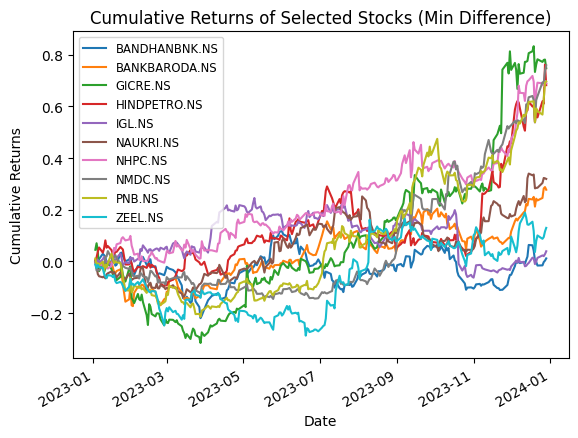

In [74]:
import matplotlib.pyplot as plt

# List of stocks
stock_symbols = max_diff
# Download historical data
start_date = "2023-01-01"
end_date = "2023-12-31"  # Use the current date or a specific end date

stock_data = yf.download(stock_symbols, start=start_date, end=end_date)["Adj Close"]

# Calculate daily returns
daily_returns = stock_data.pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot(title='Cumulative Returns of Selected Stocks (Min Difference)', xlabel='Date', ylabel='Cumulative Returns')
plt.legend(loc='upper left', fontsize='small')
plt.show()


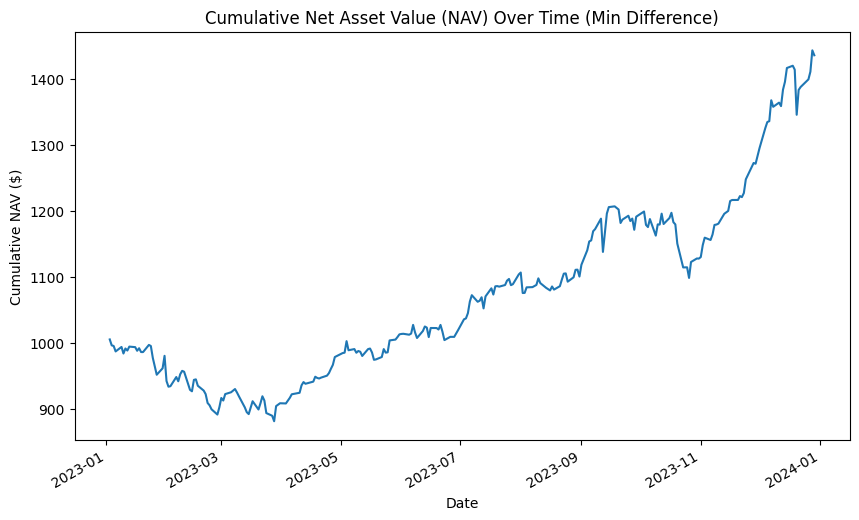

In [75]:
# Investment amount
initial_investment = 100
# Calculate daily returns
daily_returns = stock_data.pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns.dropna()).cumprod() - 1

# Calculate NAV
nav_values = initial_investment * (1 + cumulative_returns)
# Calculate cumulative NAV for the entire portfolio
cumulative_nav = nav_values.sum(axis=1)

# Plot cumulative NAV for the entire portfolio
plt.figure(figsize=(10, 6))
cumulative_nav.plot(title='Cumulative Net Asset Value (NAV) Over Time (Min Difference)', xlabel='Date', ylabel='Cumulative NAV ($)')
plt.show()